# Titanic: Machine Learning from Disaster

In this program, the famous titanic competetion from kaggle is used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier

### Loading the data

The dataset is first loaded to understand basic insights about the data 

In [3]:
org_data = pd.read_csv('all/train.csv')
test_data = pd.read_csv('all/test.csv')

In [4]:
org_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
org_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
org_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
org_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [8]:
org_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
org_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
org_data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


### Visualizing the data

Next step is to plot the data and finding some insights

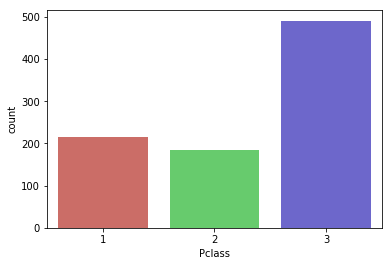

In [11]:
sns.countplot(x='Pclass', data=org_data, palette='hls')
plt.show()

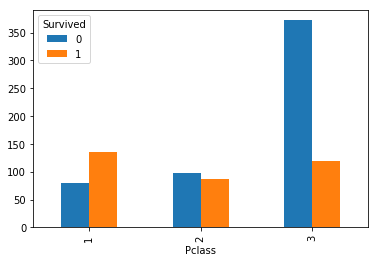

In [12]:
pd.crosstab(org_data['Pclass'],org_data['Survived']).plot(kind='bar')
plt.show()

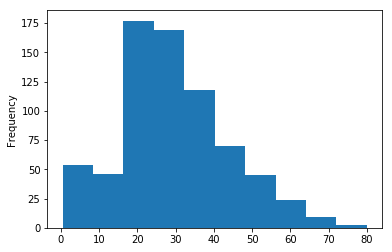

In [13]:
org_data['Age'].plot.hist()
plt.show()

### Cleaning the data

As it is observed that some values are missing, some are in strings and some features are not needed, cleaning the data is mandatory

In [14]:
data = org_data.drop(['PassengerId', 'Survived'], axis=1)

In [15]:
test_clean = test_data.drop(['PassengerId'], axis=1)

In [16]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
test_clean.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
data = pd.concat([data,test_clean], axis=0)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


#### Sex

In [20]:
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [21]:
data.Sex.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

#### Embarked

In [22]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [24]:
data['Embarked'] = data.Embarked.fillna('S')

In [25]:
data.Embarked.isnull().any()

False

In [26]:
clean_up = {'S': 1, 'C': 2, 'Q': 3}

In [27]:
data['Embarked'] = data['Embarked'].map(clean_up).astype(int)

In [28]:
data.Embarked.head()

0    1
1    2
2    1
3    1
4    1
Name: Embarked, dtype: int64

#### Name

In [29]:
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\. ')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [30]:
data.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Sir           1
Jonkheer      1
Mme           1
Dona          1
Lady          1
Don           1
Capt          1
Countess      1
Name: Title, dtype: int64

In [31]:
data.Title = data.Title.replace('Mlle', 'Miss')
data.Title = data.Title.replace('Ms', 'Miss')
data.Title = data.Title.replace('Mme', 'Mrs')

In [32]:
data.Title = data.Title.replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

In [33]:
data.Title = data.Title.replace('Mr', 0)
data.Title = data.Title.replace('Miss', 1)
data.Title = data.Title.replace('Mrs', 2)
data.Title = data.Title.replace('Master', 3)
data.Title = data.Title.replace('Other', 4)

In [34]:
# data.Title = data.Title.astype(int)
data['Title'].value_counts()

0    757
1    264
2    198
3     61
4     29
Name: Title, dtype: int64

#### Age

In [35]:
data.Age[data.Age.isnull()] = data.Title.apply(lambda x: np.random.randint(2,4) if x == 'Mr' or x == 'Mrs' else np.random.randint(0,2))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age'] = 4

In [37]:
data.Age = data.Age.astype(int)
data.Age.head()

0    1
1    2
2    1
3    2
4    2
Name: Age, dtype: int64

#### Fare

In [38]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [39]:
data.Fare.max()

512.32920000000001

In [40]:
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3

In [41]:
data.Fare = data.Fare.astype(int)
data.Fare.head()

0    0
1    3
2    1
3    3
4    1
Name: Fare, dtype: int64

#### SibSp & Parch

In [42]:
org_data['FamilySize'] = org_data.SibSp + org_data.Parch + 1

In [43]:
org_data.Survived.groupby(org_data.FamilySize).mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [101]:
org_data['IsAlone'] = org_data['FamilySize'].apply(lambda x: 0 if x in [2,3,4,7] else 1)

In [102]:
org_data.Survived.groupby(org_data.IsAlone).mean()

IsAlone
0    0.569079
1    0.287905
Name: Survived, dtype: float64

In [72]:
data['FamilySize'] = data.SibSp + data.Parch + 1

In [73]:
data['IsAlone'] = data['FamilySize'].apply(lambda x: 0 if x in [2,3,4,7] else 1)

In [74]:
data.IsAlone.value_counts()

1    856
0    453
Name: IsAlone, dtype: int64

### Feature Selection

In [75]:
features = data[['Sex', 'Pclass', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone']]

In [76]:
features.head()

,Sex,Pclass,Age,Fare,Embarked,Title,IsAlone
0,1,3,1,0,1,0,0
1,0,1,2,3,2,2,0
2,0,3,1,1,1,1,1
3,0,1,2,3,1,2,0
4,1,3,2,1,1,0,1


In [77]:
features.isnull().any()

Sex         False
Pclass      False
Age         False
Fare        False
Embarked    False
Title       False
IsAlone     False
dtype: bool

In [78]:
train_features = features[:891]
len(train_features)

891

In [79]:
X = train_features[['Sex', 'Pclass', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone']]

In [80]:
Y = org_data['Survived']

In [81]:
X.head()

,Sex,Pclass,Age,Fare,Embarked,Title,IsAlone
0,1,3,1,0,1,0,0
1,0,1,2,3,2,2,0
2,0,3,1,1,1,1,1
3,0,1,2,3,1,2,0
4,1,3,2,1,1,0,1


In [82]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Training the model with the cleaned data

Now, we can train various model with the cleaned data and compare those results

In [83]:
logreg = LogisticRegression()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01, random_state=0)

In [85]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [87]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0])

In [88]:
kneigh = KNeighborsClassifier(n_neighbors=3)  
kneigh.fit(X_train, y_train)
kneigh_y_pred = kneigh.predict(X_test) 
print('Accuracy of KNN classifier on test set: {:.2f}'.format(kneigh.score(X_test, y_test)))
print(confusion_matrix(y_test, kneigh_y_pred))
print(classification_report(y_test, kneigh_y_pred))

Accuracy of KNN classifier on test set: 0.78
[[3 0]
 [2 4]]
             precision    recall  f1-score   support

          0       0.60      1.00      0.75         3
          1       1.00      0.67      0.80         6

avg / total       0.87      0.78      0.78         9



In [89]:
svm_classifier = SVC(kernel='linear', C=1, gamma=1) 
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm_classifier.score(X_test, y_test)))
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

Accuracy of SVM classifier on test set: 0.78
[[3 0]
 [2 4]]
             precision    recall  f1-score   support

          0       0.60      1.00      0.75         3
          1       1.00      0.67      0.80         6

avg / total       0.87      0.78      0.78         9



In [90]:
dctree = DecisionTreeClassifier()
dctree.fit(X_train, y_train)
dctree_y_pred = dctree.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(dctree.score(X_test, y_test)))
print(confusion_matrix(y_test, dctree_y_pred))
print(classification_report(y_test, dctree_y_pred))

Accuracy of SVM classifier on test set: 0.78
[[3 0]
 [2 4]]
             precision    recall  f1-score   support

          0       0.60      1.00      0.75         3
          1       1.00      0.67      0.80         6

avg / total       0.87      0.78      0.78         9



In [91]:
randforest = RandomForestClassifier(n_estimators=100)
randforest.fit(X_train, y_train)
randforest_y_pred = randforest.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(randforest.score(X_test, y_test)))
print(confusion_matrix(y_test, randforest_y_pred))
print(classification_report(y_test, randforest_y_pred))

Accuracy of SVM classifier on test set: 0.78
[[3 0]
 [2 4]]
             precision    recall  f1-score   support

          0       0.60      1.00      0.75         3
          1       1.00      0.67      0.80         6

avg / total       0.87      0.78      0.78         9



In [92]:
estimators = []
estimators.append(('dctree', dctree))
estimators.append(('randforest', randforest))
estimators.append(('logreg', logreg))
estimators.append(('svm_classifier', svm_classifier))
estimators.append(('kneigh', kneigh))

ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
ensemble_y_pred = ensemble.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(ensemble.score(X_test, y_test)))
print(confusion_matrix(y_test, ensemble_y_pred))
print(classification_report(y_test, ensemble_y_pred))

Accuracy of SVM classifier on test set: 0.78
[[3 0]
 [2 4]]
             precision    recall  f1-score   support

          0       0.60      1.00      0.75         3
          1       1.00      0.67      0.80         6

avg / total       0.87      0.78      0.78         9



### Evaluating the model

Evaluate the model with test data 

In [93]:
confusion_matrix(y_test, y_pred)

array([[3, 0],
       [2, 4]])

In [94]:
classification_report(y_test, y_pred)

'             precision    recall  f1-score   support\n\n          0       0.60      1.00      0.75         3\n          1       1.00      0.67      0.80         6\n\navg / total       0.87      0.78      0.78         9\n'

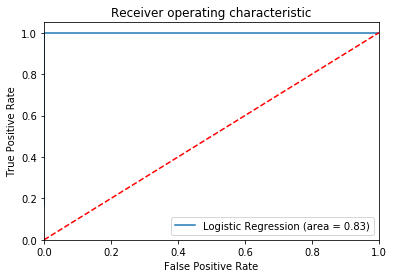

In [95]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Testing the model

In [96]:
X_final = features[891:]

In [97]:
len(X_final)

418

In [98]:
y_final = ensemble.predict(X_final)
y_final

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

In [99]:
out_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_final})
out_df.to_csv('ensemble_featured.csv', index=False)

### Conclusion

The model is trained on LogisticRegression, LinearSVC, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier and VotingClassifier. 